# Libraries

In [143]:
# import necessary libraries
import pandas as pd 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import boxcox
import scipy.stats
import warnings
from sklearn.neighbors import KNeighborsRegressor

# from pycaret.regression import setup, compare_models
# from pycaret.regression import *
# from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
# from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor




sns.set_palette("pastel")

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

%matplotlib inline

# Merge and Read Data

In [144]:
train = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../data/house-prices-advanced-regression-techniques/sample_submission.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
target = train.SalePrice
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [146]:
all_data = train.drop('SalePrice', axis= 1)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [147]:
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print(f'All data shape: {all_data.shape}')
print(f'Target shape: {target.shape}')

Train shape: (1460, 81)
Test shape: (1459, 80)
All data shape: (1460, 80)
Target shape: (1460,)


# EDA

In [148]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [149]:
all_data.MSSubClass = all_data.MSSubClass.astype('str')

In [150]:
all_data.drop('Id', axis= 1, inplace= True)

In [151]:
all_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [152]:
describe = all_data.describe().T
describe['nunique'] = all_data.nunique()
describe['NULLS'] = all_data.isnull().sum()
describe

,count,mean,std,min,25%,50%,75%,max,nunique,NULLS
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,110,259
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,1073,0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,10,0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,9,0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,112,0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,61,0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,327,8
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,637,0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0,144,0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0,780,0


In [153]:
def nulls_per(df):
    # Assuming 'train' is your DataFrame
    missing_values = df.isnull().sum()
    total_rows = df.shape[0]

    # Create a DataFrame to display the missing values information
    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Percentage': (missing_values / total_rows) * 100
    })

    # Filter the DataFrame to show only columns with missing values
    columns_with_missing_values = missing_info[missing_info['Missing Values'] > 0]

    # Display the filtered information
    print(f"\nColumns with Missing Values , the shape: {df.shape}")
    return columns_with_missing_values.sort_values(by='Missing Values', ascending=False)

nulls_per(all_data)


Columns with Missing Values , the shape: (1460, 79)


,Column,Missing Values,Percentage
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
MasVnrType,MasVnrType,872,59.726027
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945


In [154]:
categorical_1=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
   ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for column in categorical_1:
    all_data[column] = all_data[column].fillna("None")

In [155]:
categorical_2=['MasVnrType','MSZoning','Functional','Utilities','SaleType','Exterior2nd','Exterior1st',
         'Electrical' ,'KitchenQual']
for column in categorical_1:
    all_data[column] = all_data[column].fillna(all_data[column].mode()[0])

In [156]:
nulls_per(all_data)


Columns with Missing Values , the shape: (1460, 79)


,Column,Missing Values,Percentage
MasVnrType,MasVnrType,872,59.726027
LotFrontage,LotFrontage,259,17.739726
GarageYrBlt,GarageYrBlt,81,5.547945
MasVnrArea,MasVnrArea,8,0.547945
Electrical,Electrical,1,0.068493


In [157]:
def optimize_knn_imputer(data, col, neighbors_list):
    numerical_data = data.select_dtypes(exclude='O')
    clean_numerical_cols = numerical_data.isna().sum()[numerical_data.isna().sum() == 0].index
    
    X_train = numerical_data[clean_numerical_cols][numerical_data[col].notna()]
    y_train = numerical_data[col][numerical_data[col].notna()]
    
    X_test = numerical_data[clean_numerical_cols][numerical_data[col].isna()]

    # Check if X_test is empty
    if X_test.empty:
        print(f"No missing values to impute in column: {col}")
        return data

    param_grid = {'n_neighbors': neighbors_list}
    
    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    
    grid_search.fit(X_train, y_train)
    
    best_n_neighbors = grid_search.best_params_['n_neighbors']
    best_knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    best_knn.fit(X_train, y_train)
    
    y_pred = best_knn.predict(X_test)
    
    data.loc[data[col].isna(), col] = y_pred
    
    return data


In [158]:
num_f = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
    'BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']

clean_df = all_data.copy()

for col in num_f:
    clean_df = optimize_knn_imputer(clean_df, col, neighbors_list=[1, 3, 5, 7, 9])

No missing values to impute in column: BsmtFinSF1
No missing values to impute in column: BsmtFinSF2
No missing values to impute in column: BsmtUnfSF
No missing values to impute in column: TotalBsmtSF
No missing values to impute in column: BsmtFullBath
No missing values to impute in column: BsmtHalfBath
No missing values to impute in column: GarageCars
No missing values to impute in column: GarageArea


In [159]:
nulls_per(clean_df)


Columns with Missing Values , the shape: (1460, 79)


,Column,Missing Values,Percentage
MasVnrType,MasVnrType,872,59.726027
Electrical,Electrical,1,0.068493


# Feature Engineering

In [160]:
clean_df['TotalArea']=clean_df['LotFrontage']+clean_df['LotArea']

clean_df['Total_Home_Quality'] = clean_df['OverallQual'] + clean_df['OverallCond']

clean_df['Total_Bathrooms'] = (clean_df['FullBath'] + (0.5 * clean_df['HalfBath']) +
                               clean_df['BsmtFullBath'] + (0.5 * clean_df['BsmtHalfBath']))
clean_df["AllSF"] = clean_df["GrLivArea"] + clean_df["TotalBsmtSF"]

clean_df["AvgSqFtPerRoom"] = clean_df["GrLivArea"] / (clean_df["TotRmsAbvGrd"] +
                                                       clean_df["FullBath"] +
                                                       clean_df["HalfBath"] +
                                                       clean_df["KitchenAbvGr"])

clean_df["totalFlrSF"] = clean_df["1stFlrSF"] + clean_df["2ndFlrSF"]

In [161]:
clean_df['MoSold'] = (-np.cos(0.5236 * clean_df['MoSold']))

In [162]:
def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
clean_df['GarageArea_cat'] = clean_df['GarageArea'].apply(Gar_category).astype('str')

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
clean_df['GrLivArea_cat'] = clean_df['GrLivArea'].apply(Low_category).astype('str')

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['1stFlrSF_cat'] = clean_df['1stFlrSF'].apply(fl1_category).astype('str')
clean_df['2ndFlrSF_cat'] = clean_df['2ndFlrSF'].apply(fl1_category).astype('str')

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['TotalBsmtSF_cat'] = clean_df['TotalBsmtSF'].apply(bsmtt_category).astype('str')

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['BsmtUnfSF_cat'] = clean_df['BsmtUnfSF'].apply(bsmt_category).astype('str')

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
clean_df['LotFrontage_cat'] = clean_df['LotFrontage'].apply(lot_category).astype('str')

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
clean_df['LotArea_cat'] = clean_df['LotArea'].apply(lot_category1).astype('str')

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5



clean_df['YearBuilt_cat'] = clean_df['YearBuilt'].apply(year_category).astype('str').astype('str').astype('str')
clean_df['YearRemodAdd_cat'] = clean_df['YearRemodAdd'].apply(year_category).astype('str').astype('str')
clean_df['GarageYrBlt_cat'] = clean_df['GarageYrBlt'].apply(year_category).astype('str')

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

clean_df['MasVnrArea_cat'] = clean_df['MasVnrArea'].apply(vnr_category).astype('str')

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

clean_df['AllSF_cat'] = clean_df['AllSF'].apply(allsf_category).astype('str')

In [163]:
data_1 = clean_df.copy()

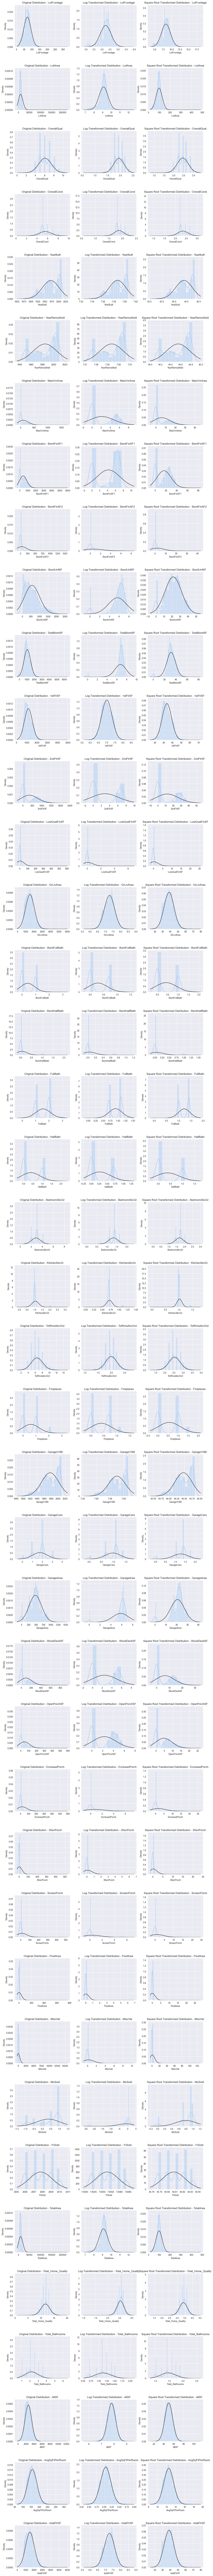

In [164]:
numerical_features = data_1.select_dtypes(include=np.number).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=3, figsize=(15, 5 * len(numerical_features)))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    # Original Distribution
    sns.distplot(data_1[feature], kde=True, ax=axes[i, 0],fit=scipy.stats.norm)
    axes[i, 0].set_title(f'Original Distribution - {feature}')

    # Log-Transformed Distribution
    log_transformed = np.log1p(data_1[feature])  # Adding 1 to avoid log(0)
    sns.distplot(log_transformed, kde=True, ax=axes[i, 1],fit=scipy.stats.norm)
    axes[i, 1].set_title(f'Log-Transformed Distribution - {feature}')

    # Square Root Transformed Distribution
    sqrt_transformed = np.sqrt(data_1[feature])
    sns.distplot(sqrt_transformed, kde=True, ax=axes[i, 2],fit=scipy.stats.norm)
    axes[i, 2].set_title(f'Square Root Transformed Distribution - {feature}')

plt.show()

In [165]:
skew_df = pd.DataFrame(data_1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Original_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data_1[feature]))
skew_df['original_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(data_1[feature]))

skew_df['log_transformed_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(  np.log1p(data_1[feature]) )  )
skew_df['log_transformed_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(  np.log1p(data_1[feature]) )  )

skew_df['sqrt_transformed_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(  np.sqrt(data_1[feature]) )  )
skew_df['sqrt_transformed_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(  np.sqrt(data_1[feature]) )  )




skew_df.set_index('Feature', inplace=True)
skew_df

,Original_Skewness,original_ kurtosis,log_transformed_Skewness,log_transformed_ kurtosis,sqrt_transformed_Skewness,sqrt_transformed_ kurtosis
Feature,,,,,,
LotFrontage,1.927305,16.313913,-0.822771,2.406071,0.231366,3.843305
LotArea,12.195142,202.543793,-0.137263,4.693587,4.135459,40.383355
OverallQual,0.216721,0.091857,-0.590370,2.024679,-0.218064,0.763105
OverallCond,0.692355,1.098521,-0.253754,3.263295,0.185528,1.861648
YearBuilt,-0.612831,-0.442155,-0.640470,-0.380721,-0.626593,-0.411827
YearRemodAdd,-0.503044,-1.271999,-0.510480,-1.263149,-0.506762,-1.267589
MasVnrArea,2.655417,9.986969,0.483048,-1.638441,1.028267,0.001411
BsmtFinSF1,1.683771,11.076090,-0.617774,-1.475840,-0.029915,-1.159322
BsmtFinSF2,4.250888,20.040415,2.521100,4.532339,3.033689,8.330692


In [166]:
to_log1p=['LotArea','MasVnrArea','BsmtFinSF2','1stFlrSF','LowQualFinSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd'
         ,'GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
         ,'TotalArea','AllSF','AvgSqFtPerRoom','totalFlrSF']
to_sqrt=['LotFrontage','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtHalfBath','Total_Bathrooms',]
for col in to_log1p:
    data_1[col]=np.log1p (data_1[col])
for col in to_sqrt:
    data_1[col]=np.sqrt (data_1[col])

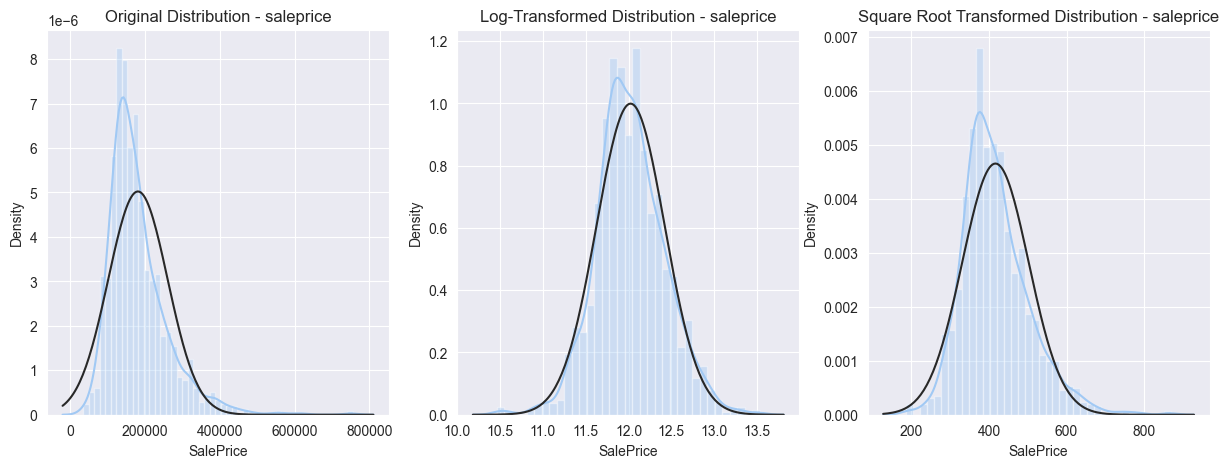

original skew = 1.880940746034036 
original kurtosis = 6.509812011089439
log skew = 0.12122191311528359 
log kurtosis = 0.8026427107468055
sqrt skew = 0.9421834681211159 
sqrt kurtosis = 1.9469987212364908


In [167]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5 ))
feature='saleprice'
# Original Distribution
sns.distplot(target, kde=True, ax=axes[0],fit=scipy.stats.norm)
axes[0].set_title(f'Original Distribution - {feature}')


    # Log-Transformed Distribution
log_transformed = np.log1p(target)  # Adding 1 to avoid log(0)
sns.distplot(log_transformed, kde=True, ax=axes[1],fit=scipy.stats.norm)
axes[1].set_title(f'Log-Transformed Distribution - {feature}')

    # Square Root Transformed Distribution
sqrt_transformed = np.sqrt(target)
sns.distplot(sqrt_transformed, kde=True, ax=axes[2],fit=scipy.stats.norm)
axes[2].set_title(f'Square Root Transformed Distribution - {feature}')

plt.show()
print(f'original skew = {scipy.stats.skew(target)} \noriginal kurtosis = {scipy.stats.kurtosis(target)}')
print(f'log skew = { scipy.stats.skew(np.log1p (target) )} \nlog kurtosis = {scipy.stats.kurtosis(np.log1p (target))}')
print(f'sqrt skew = { scipy.stats.skew(np.sqrt (target) )} \nsqrt kurtosis = {scipy.stats.kurtosis(np.sqrt (target))}')

In [168]:
log_target=np.log1p(target)

In [169]:
encoded_df=data_1.copy()
encoded_df=pd.get_dummies(data_1)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 380 entries, LotFrontage to AllSF_cat_7
dtypes: bool(339), float64(27), int64(14)
memory usage: 951.1 KB


In [170]:
encoded_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt_cat_3,GarageYrBlt_cat_4,GarageYrBlt_cat_5,MasVnrArea_cat_1,MasVnrArea_cat_2,MasVnrArea_cat_3,MasVnrArea_cat_4,AllSF_cat_1,AllSF_cat_2,AllSF_cat_7
0,8.062258,9.042040,7,5,2003,2003,5.283204,26.570661,0.000000,12.247449,...,False,False,True,True,False,False,False,False,False,True
1,8.944272,9.169623,6,8,1976,1976,0.000000,31.272992,0.000000,16.852300,...,True,False,False,True,False,False,False,False,False,True
2,8.246211,9.328212,7,5,2001,2002,5.093750,22.045408,0.000000,20.832667,...,False,False,True,True,False,False,False,False,False,True
3,7.745967,9.164401,7,5,1915,1970,0.000000,14.696938,0.000000,23.237900,...,False,True,False,True,False,False,False,False,False,True
4,9.165151,9.565284,8,5,2000,2000,5.860786,25.592968,0.000000,22.135944,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7.874008,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,30.870698,...,False,True,False,True,False,False,False,False,False,True
1456,9.219544,9.486152,6,6,1978,1988,4.787492,28.106939,5.099866,24.269322,...,True,False,False,True,False,False,False,False,False,True
1457,8.124038,9.109746,7,9,1941,2006,0.000000,16.583124,0.000000,29.614186,...,False,False,False,True,False,False,False,False,False,True
1458,8.246211,9.181735,5,6,1950,1996,0.000000,7.000000,6.937314,0.000000,...,False,False,False,True,False,False,False,False,False,True


In [171]:
robust_scaler = RobustScaler()
scaled_df=pd.DataFrame(robust_scaler.fit_transform(encoded_df), index=encoded_df.index, columns=encoded_df.columns)
scaled_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt_cat_3,GarageYrBlt_cat_4,GarageYrBlt_cat_5,MasVnrArea_cat_1,MasVnrArea_cat_2,MasVnrArea_cat_3,MasVnrArea_cat_4,AllSF_cat_1,AllSF_cat_2,AllSF_cat_7
0,-0.242393,-0.267660,0.5,0.0,0.652174,0.243243,1.032280,0.261822,0.0,-0.711843,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.460085,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.438018,0.0,-0.370545,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.095883,0.399288,0.5,0.0,0.608696,0.216216,0.995263,0.092261,0.0,-0.075531,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.494302,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.183086,0.0,0.102738,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.636004,0.951802,1.0,0.0,0.586957,0.162162,1.145134,0.225188,0.0,0.021064,...,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [172]:
log_target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [173]:
X = scaled_df
y = target
# X_test=scaled_df.iloc[1460:]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 380), (292, 380), (1168,), (292,))

In [175]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(17323.697020547945, 895845019.7581851, 29930.67021899418, 0.8832063988466651)

In [176]:
# Creating a DataFrame to display the actual and predicted Sale Prices
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': y_pred
})

# Resetting index for clarity
predictions_df.reset_index(drop=True, inplace=True)

# Displaying the DataFrame with predictions
predictions_df

,Actual SalePrice,Predicted SalePrice
0,154500,141029.00
1,325000,338637.82
2,115000,115364.29
3,159000,162230.00
4,315500,320010.30
...,...,...
287,89471,117721.36
288,260000,253907.70
289,189000,180208.52
290,108000,126289.55
